In [616]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'
from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap


In [617]:
taem_phase_color_map_val = [0, 1, 2, 3]
taem_phase_color_map = ListedColormap(['red', 'blue', 'green', 'orange'])

In [618]:
data_taem = pd.read_csv('taem_dump.csv')

data_taem['time'] = data_taem['dtg'].cumsum()

xali = -27500.7961639
data_taem['drpred'] = data_taem['rpred'] + xali

data_taem.head()

data_taem.dtypes

,dtg,wow,h,hdot,x,y,surfv,surfv_h,xdot,ydot,...,gssh,hk,xk,xexp,herrexp,nzc1,nzc2h,nzc2i,Unnamed: 100,time
0,0.22,False,145226.720717,-370.500479,66299.298757,676659.770318,5254.810999,5241.733304,-32.316817,-5241.633682,...,2.5,16773.500051,-4239.940566,-4959.660458,0,0,0,0,NaN,0.22
1,0.24,False,145137.528815,-372.728226,66273.093260,675410.967593,5252.770725,5239.529937,-32.396158,-5239.429783,...,2.5,16773.500051,-4239.940566,-4959.660458,0,0,0,0,NaN,0.46
2,0.24,False,145047.810495,-374.893453,66246.913156,674162.689392,5250.701714,5237.301155,-32.525494,-5237.200157,...,2.5,16773.500051,-4239.940566,-4959.660458,0,0,0,0,NaN,0.70
3,0.24,False,144957.564162,-377.018138,66220.754055,672914.933022,5248.628996,5235.070550,-32.738052,-5234.968184,...,2.5,16773.500051,-4239.940566,-4959.660458,0,0,0,0,NaN,0.94
4,0.24,False,144866.803557,-378.986103,66194.596837,671667.705538,5246.492298,5232.786158,-32.974755,-5232.682260,...,2.5,16773.500051,-4239.940566,-4959.660458,0,0,0,0,NaN,1.18


dtg             float64
wow                bool
h               float64
hdot            float64
x               float64
y               float64
surfv           float64
surfv_h         float64
xdot            float64
ydot            float64
psd             float64
mach            float64
qbar            float64
cosphi          float64
costh           float64
weight          float64
gamma           float64
ovhd               bool
rwid             object
cubic_c3        float64
cubic_c4        float64
pbhc_0            int64
pbhc_1          float64
pbrc_0            int64
pbrc_1          float64
delrng            int64
dnzc            float64
dnzcl           float64
dnzll           float64
dnzul           float64
dpsac           float64
drpred          float64
dsbc_at         float64
dsbi              int64
eas_cmd         float64
emep            float64
eow             float64
en              float64
emax            float64
emin            float64
es              float64
gdh             

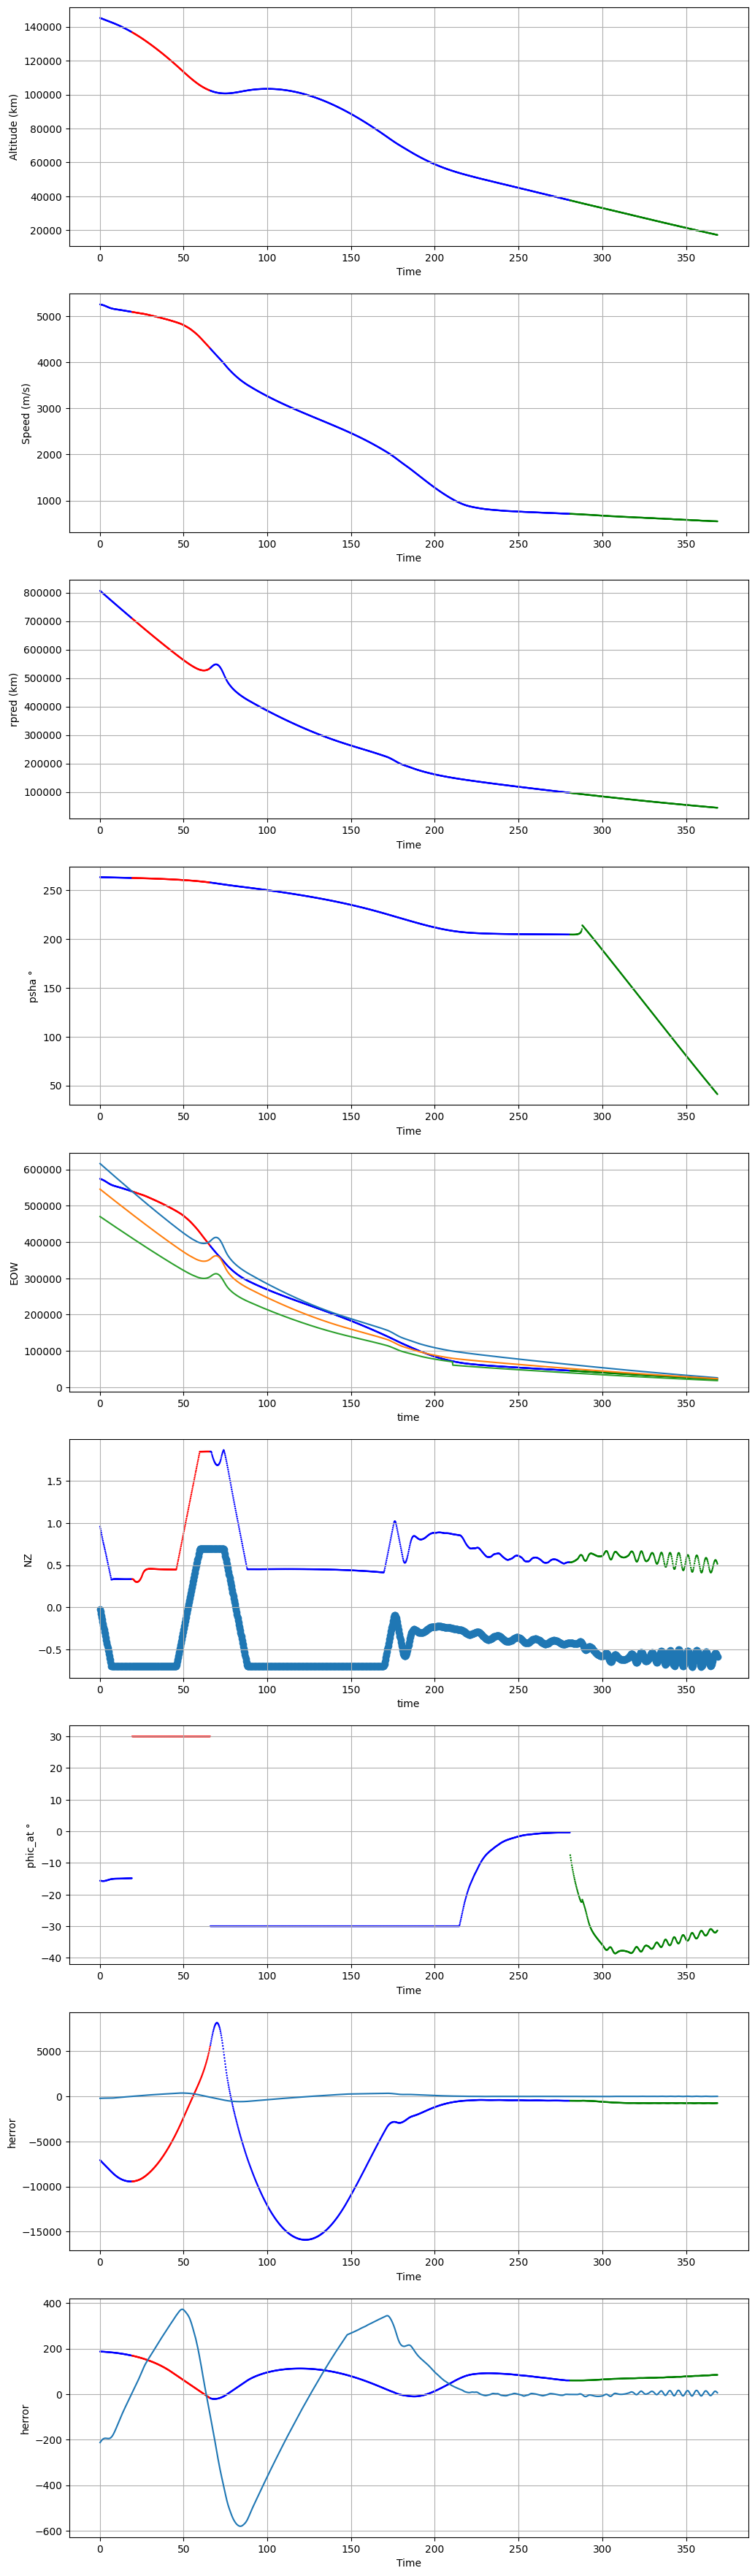

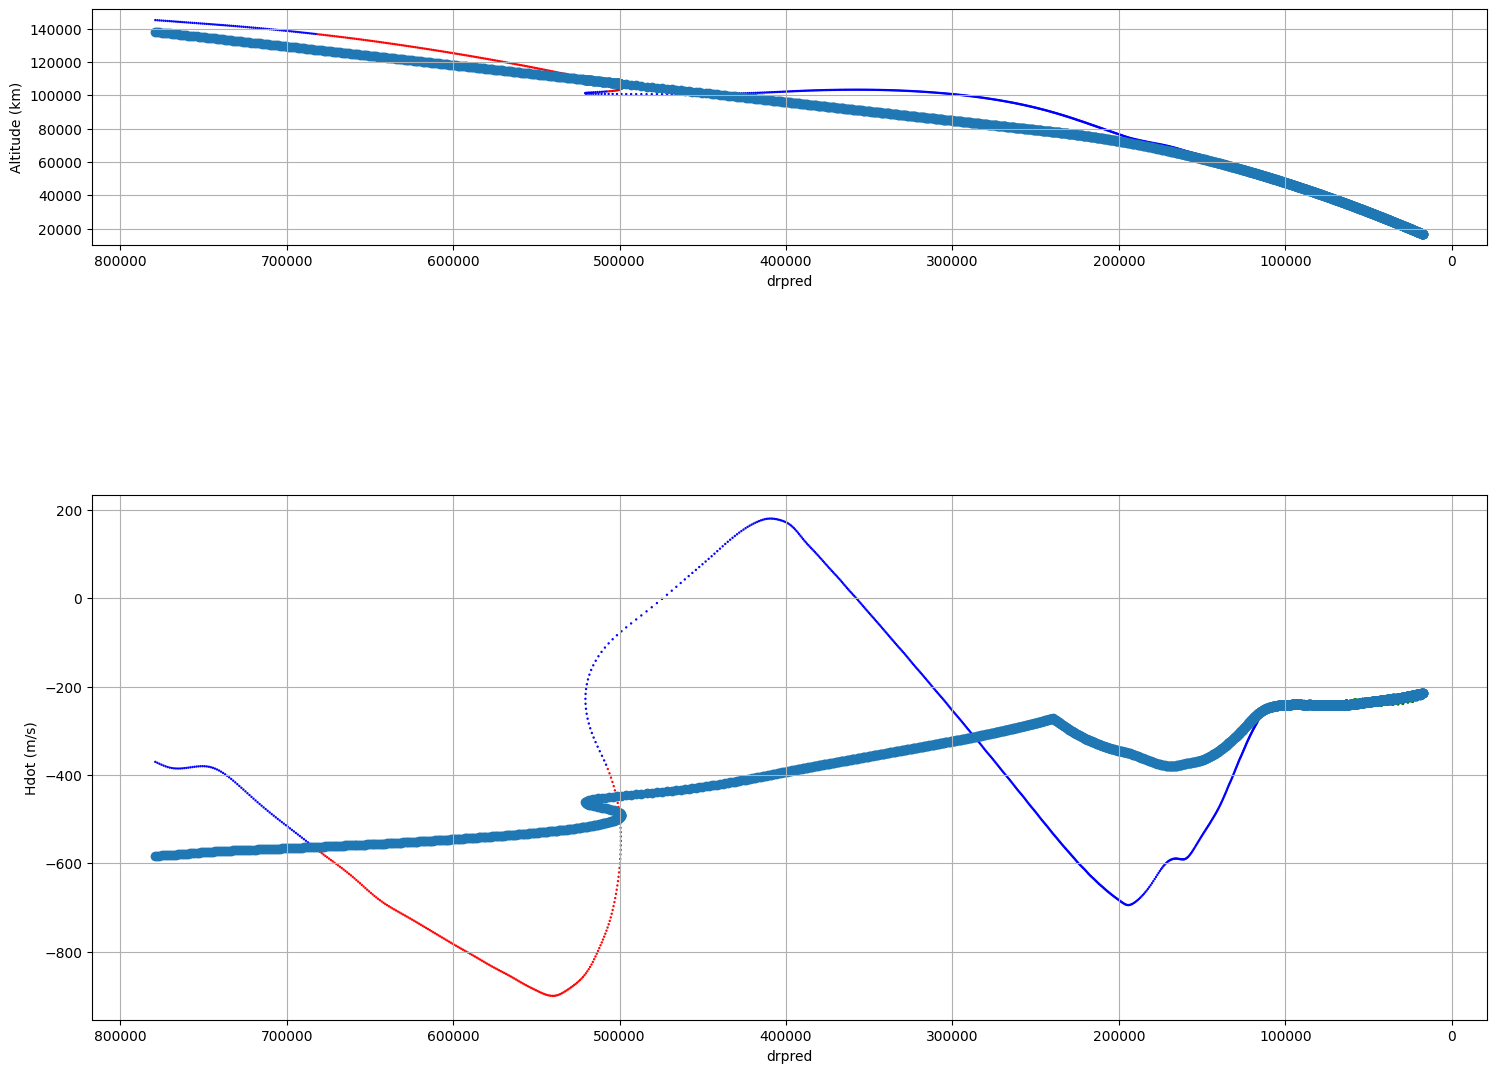

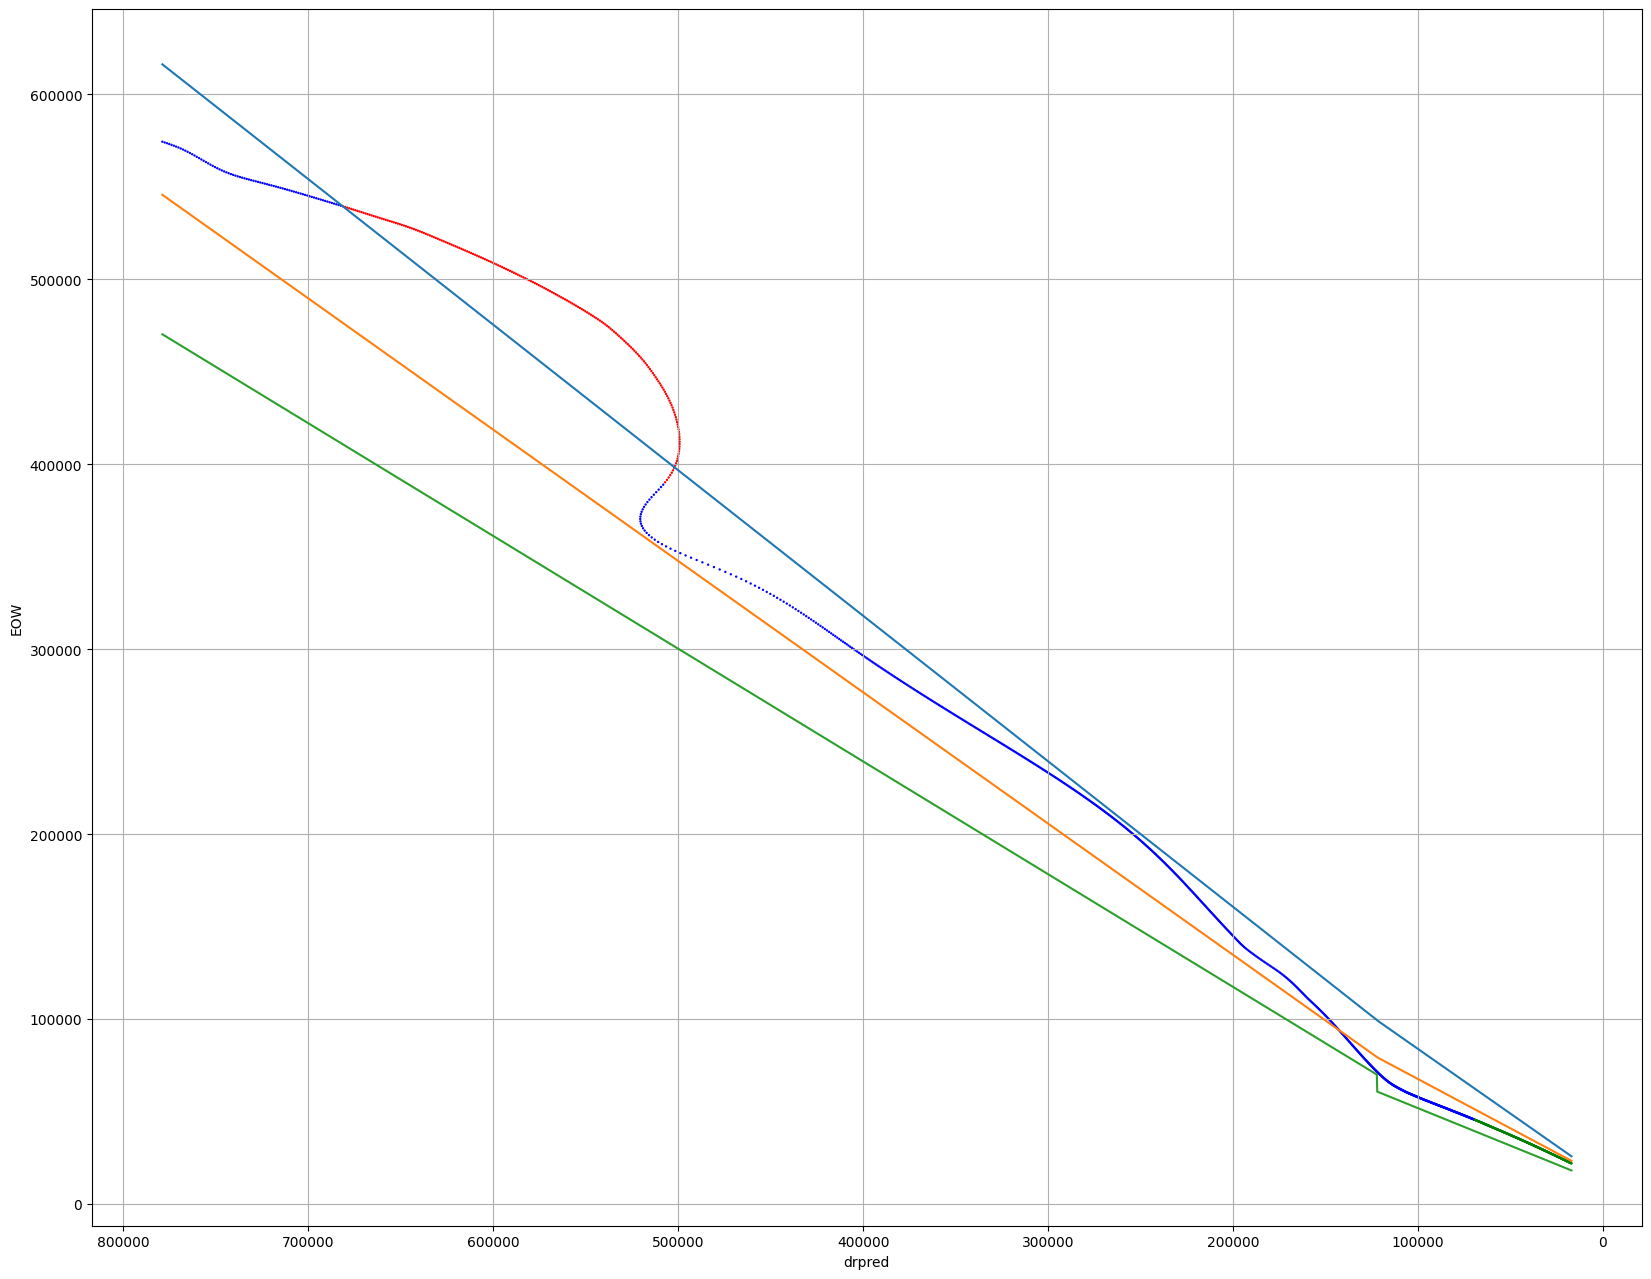

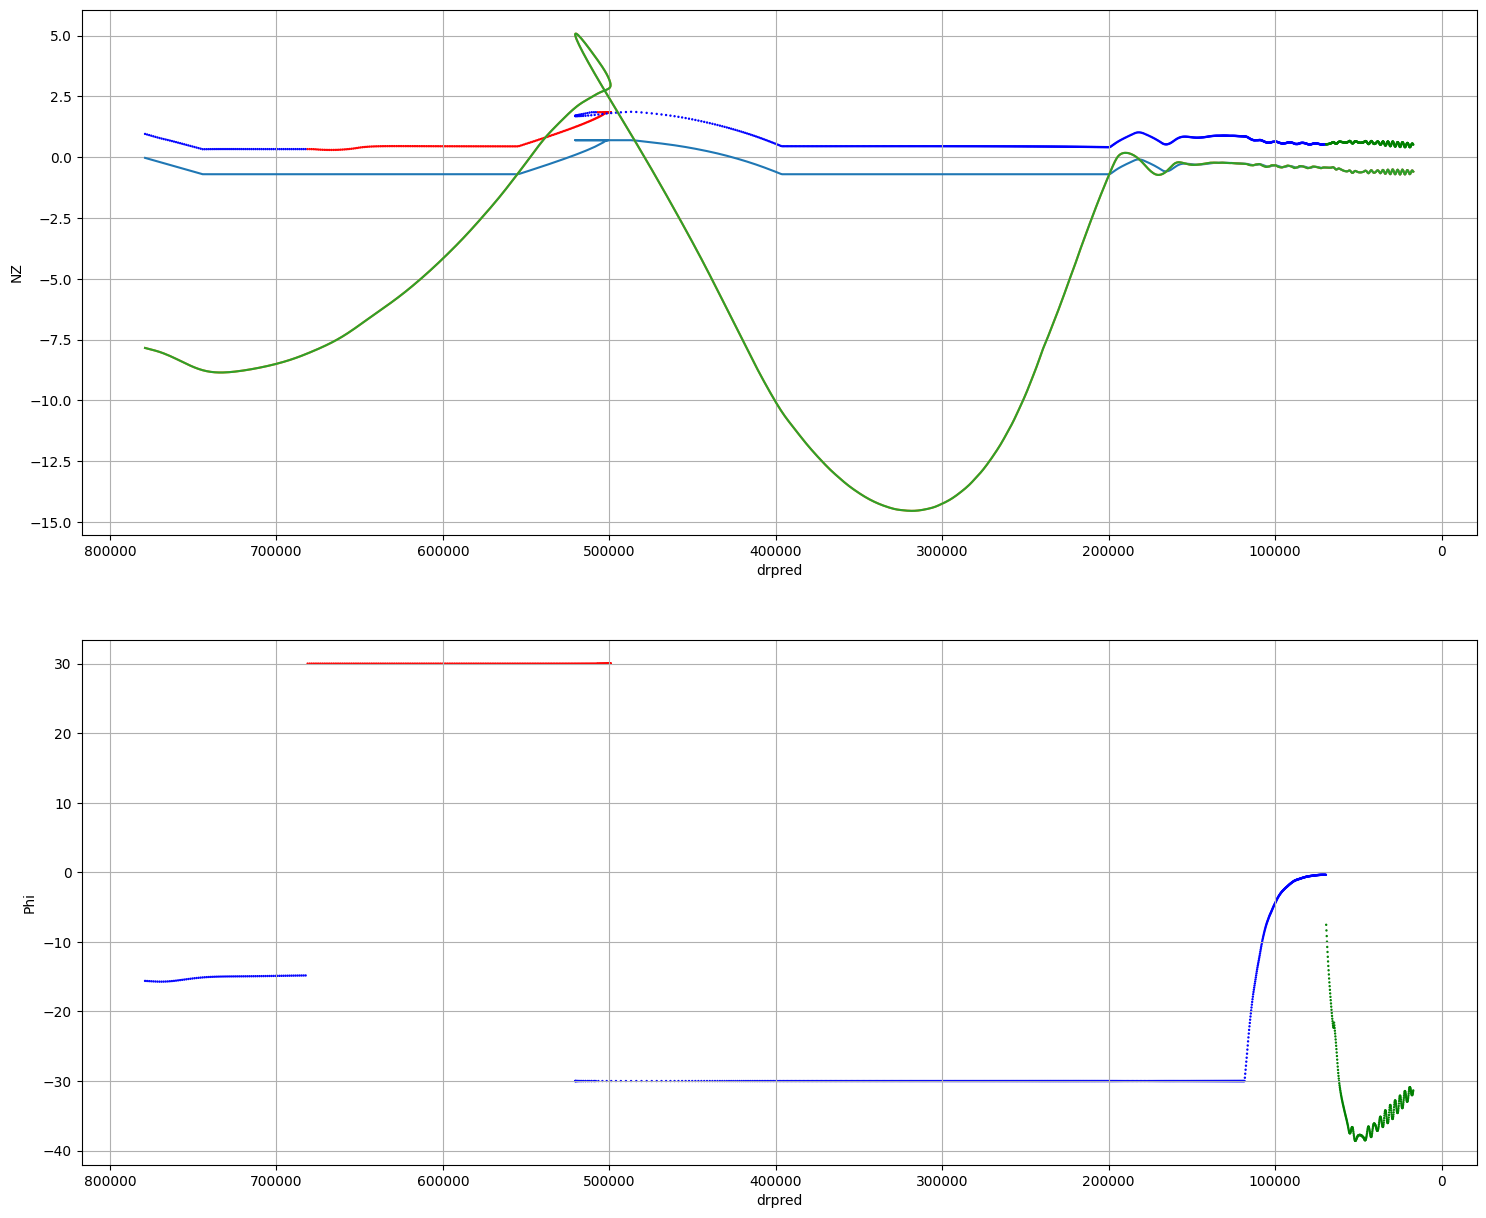

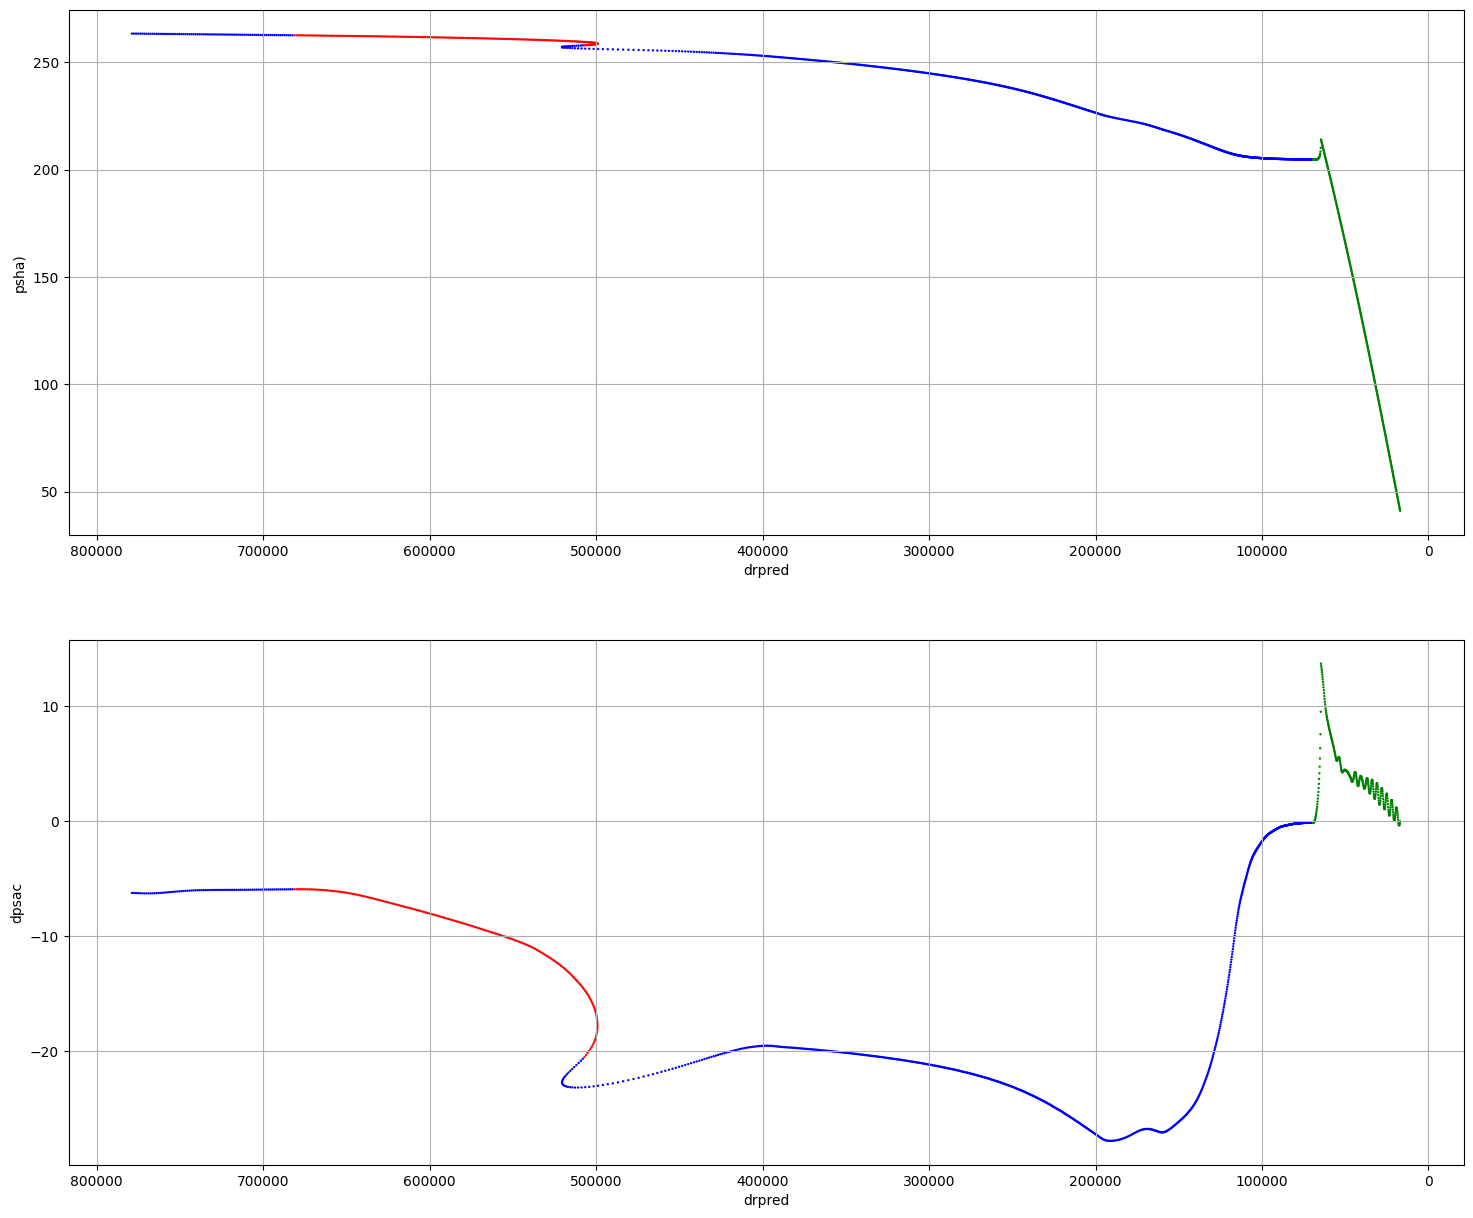

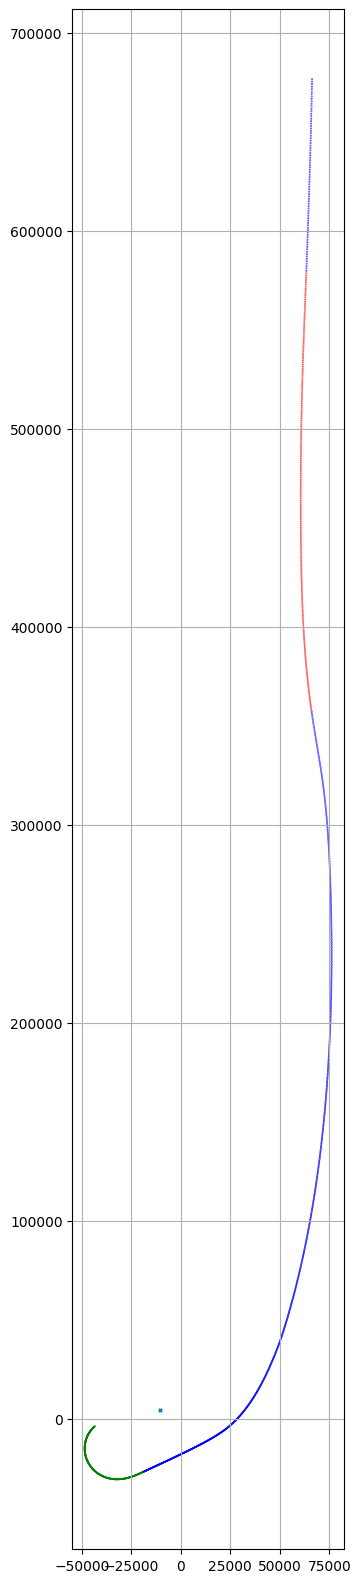

In [619]:
def taem_plots(data):
    
    

    
    fig_1, ax_1 = plt.subplots(nrows=9, ncols=1, figsize=(12, 5 * 9))

    plt_ = ax_1[0]
    plt_.scatter(data['time'], data['h'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_ = ax_1[1]
    plt_.scatter(data['time'], data['surfv'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('Speed (m/s)')
    plt_.grid()
    
    plt_ = ax_1[2]
    plt_.scatter(data['time'], data['rpred'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('rpred (km)')
    plt_.grid()
    
    plt_ = ax_1[3]
    plt_.scatter(data['time'], data['psha'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('psha °')
    plt_.grid()
    
    
    plt_ = ax_1[4]
    plt_.scatter(data['time'], data['eow'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['time'], data['es'])
    plt_.plot(data['time'], data['en'])
    plt_.plot(data['time'], data['emep'])
    

    plt_.set_xlabel('time')
    plt_.set_ylabel('EOW')
    plt_.grid()

    plt_ = ax_1[5]
    plt_.scatter(data['time'], data['nzc'])
    plt_.scatter(data['time'], data['nztotal'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('time')
    plt_.set_ylabel('NZ')
    plt_.grid()
    
    plt_ = ax_1[6]
    plt_.scatter(data['time'], data['phic_at'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('Time')
    plt_.set_ylabel('phic_at °')
    plt_.grid()

    
    plt_ = ax_1[7]
    plt_.scatter(data['time'], data['herror'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['time'], data['hderr'])

    plt_.set_xlabel('Time')
    plt_.set_ylabel('herror')
    plt_.grid()
                               
    plt_ = ax_1[8]
    plt_.scatter(data['time'], data['qberr'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['time'], data['hderr'])

    plt_.set_xlabel('Time')
    plt_.set_ylabel('herror')
    plt_.grid()


                               
    
    

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.scatter(data['drpred'], data['h'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.scatter(data['drpred'], data['href'])

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('Altitude (km)')
    plt_.grid()

    plt_.invert_xaxis()

    plt_.set_aspect('equal')


    plt_ = ax[1]
    plt_.scatter(data['drpred'], data['hdot'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.scatter(data['drpred'], data['hdref'])

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('Hdot (m/s)')
    plt_.grid()

    plt_.invert_xaxis()


     
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
    plt_ = ax
    plt_.scatter(data['drpred'], data['eow'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    plt_.plot(data['drpred'], data['es'])
    plt_.plot(data['drpred'], data['en'])
    plt_.plot(data['drpred'], data['emep'])
    

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('EOW')
    plt_.grid()

    plt_.invert_xaxis()

    plt_.set_aspect('equal')


    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.plot(data['drpred'], data['nzc'])
    plt_.plot(data['drpred'], data['dnzc'])
    plt_.plot(data['drpred'], data['dnzcl'])
    plt_.scatter(data['drpred'], data['nztotal'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('NZ')
    plt_.grid()

    plt_.invert_xaxis()
    
    
    plt_ = ax[1]
    plt_.scatter(data['drpred'], data['phic_at'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('Phi')
    plt_.grid()

    plt_.invert_xaxis()
    
    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 15))

    plt_ = ax[0]
    plt_.scatter(data['drpred'], data['psha'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('psha)')
    plt_.grid()

    plt_.invert_xaxis()
    
    plt_ = ax[1]
    plt_.scatter(data['drpred'], data['dpsac'], s=0.5, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

    plt_.set_xlabel('drpred')
    plt_.set_ylabel('dpsac')
    plt_.grid()

    plt_.invert_xaxis()
    
        
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

    plt_ = ax
    plt_.scatter(data['x'], data['y'], s=0.1, c=data['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
    
    plt_.scatter(-10590.456, 4267.2, s=5, marker='x')
    
    plt_.set_aspect('equal')

    plt_.grid()
    
    
    
taem_plots(data_taem)

Text(0, 0.5, 'EOW')

Text(0, 0.5, 'EOW')

(0.0, 100000.0)

(0.0, 100000.0)

Text(0, 0.5, 'EOW')

NameError: name 'encorr' is not defined

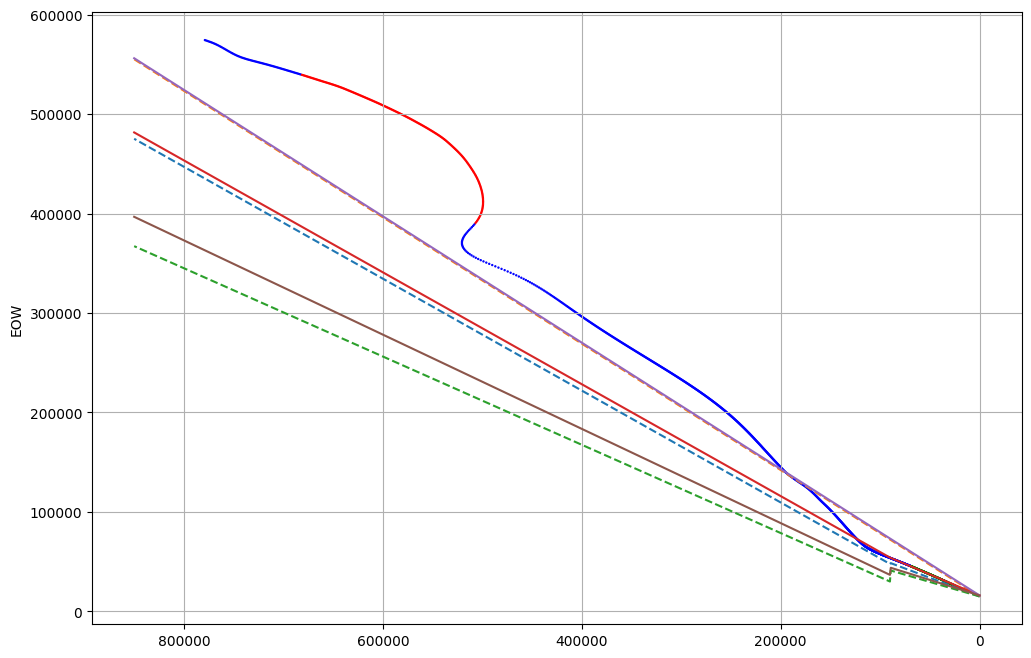

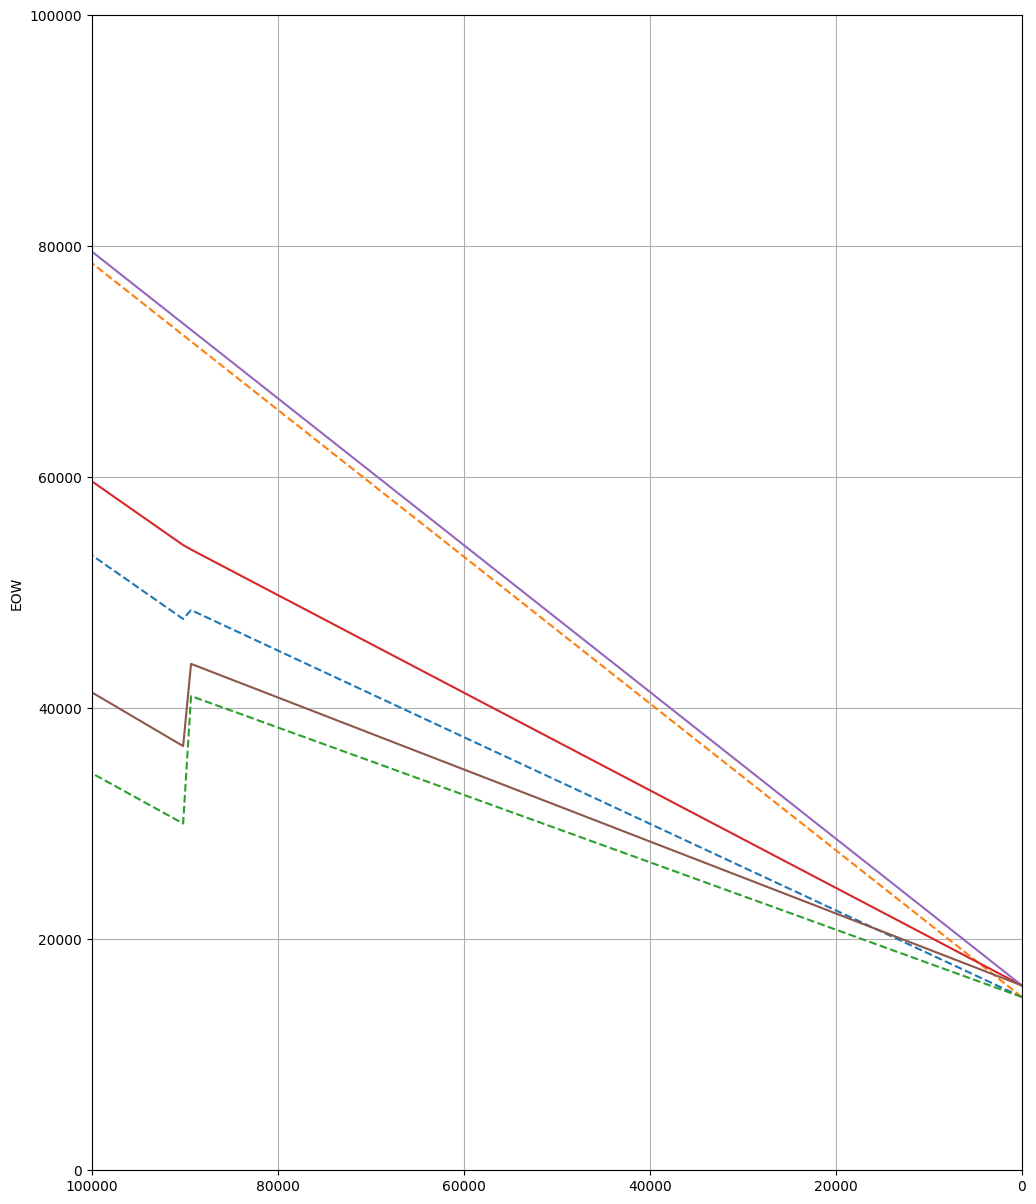

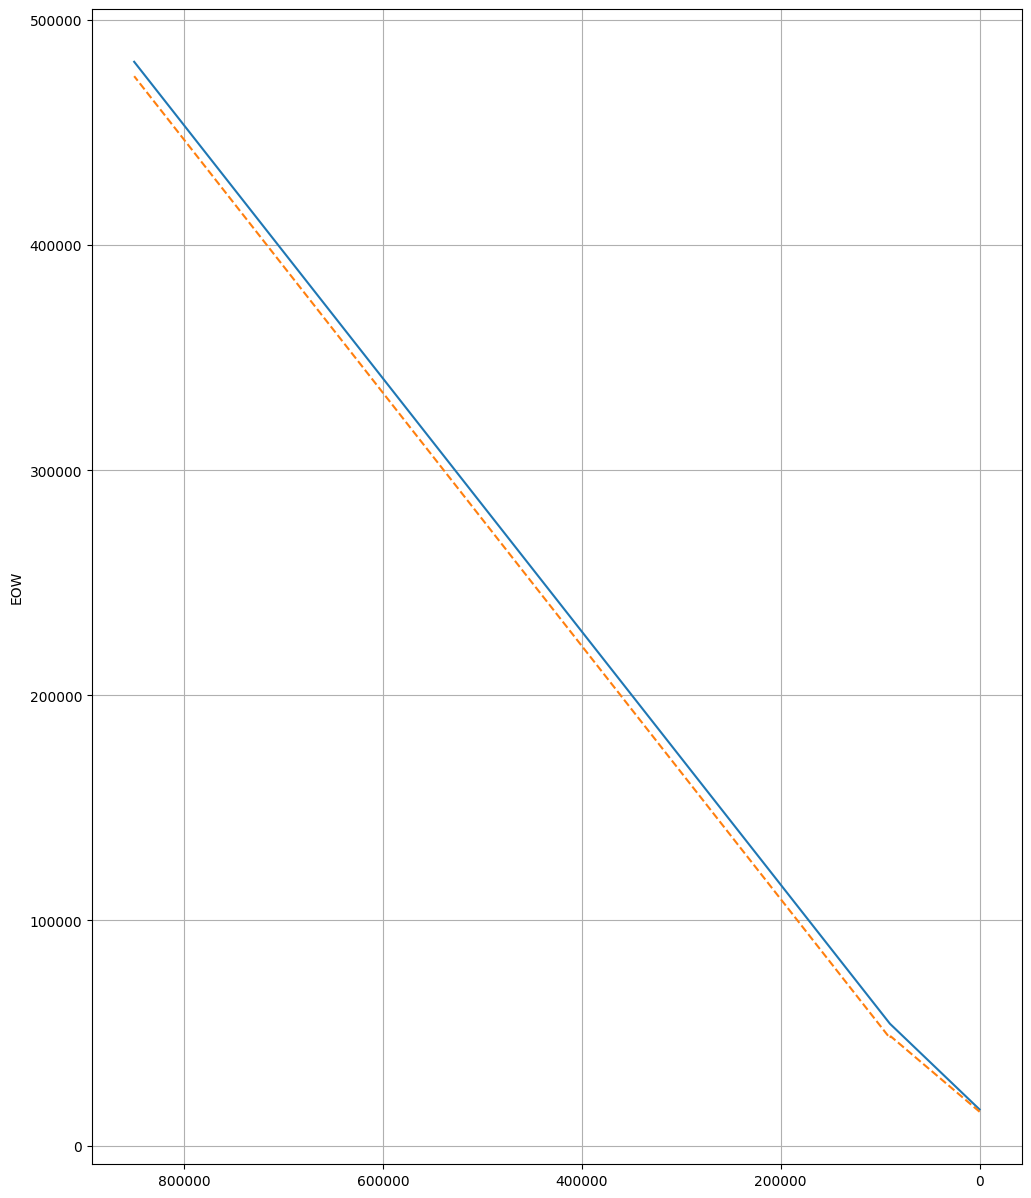

In [620]:


def en_0(drpred):

    en_c1 = [-3000, 15000]
    en_c2 = [0.5625, 0.375]
    
    eow_spt = 90000
    
    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    en = en_c1[iel] + drpred * en_c2[iel] 
    
    return en


def es_0(drpred):
    
    es_c1 = [15000, 15000]
    es_c2 = [0.635416, 0.635416]
    
    eow_spt = 90000
    
    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    es = es_c1[iel] + drpred * es_c2[iel] 
    
    return es

def emep_0(drpred):
    
    emep_c1 = [-10000, 15000]
    emep_c2 = [0.44375, 0.29168]
    
    eow_spt = 90000
    
    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    emep = emep_c1[iel] + drpred * emep_c2[iel] 
    
    return emep



def en2_(drpred):
    
    en_c1 = [3400, 16000]
    en_c2 = [0.5625, 0.4225]
    
    eow_spt = 90000
    
    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    en = en_c1[iel] + drpred * en_c2[iel] 
    
    return en


def es2_(drpred):
    
    es_c1 = [16000, 16000]
    es_c2 = [0.635416, 0.635416]

    eow_spt = 90000

    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    es = es_c1[iel] + drpred * es_c2[iel] 
    
    
    return es

def emep2_(drpred):
    
    emep_c1 = [-6000, 16000]
    emep_c2 = [0.47375, 0.31168]
    
    eow_spt = 90000
    
    iel = 0
    if (drpred < eow_spt):
        iel = 1
    
    emep = emep_c1[iel] + drpred * emep_c2[iel] 
    
    return emep



drpred = np.linspace(0, 850000, 1000)

en0 = [en_0(r) for r in drpred]
emep0 = [emep_0(r) for r in drpred]
es0 = [es_0(r) for r in drpred]

en2 = [en2_(r) for r in drpred]
emep2 = [emep2_(r) for r in drpred]
es2 = [es2_(r) for r in drpred]




fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()

plt_.set_aspect('equal')

plt_.invert_xaxis()

plt.plot(drpred, en0, '--')
plt.plot(drpred, es0, '--')
plt.plot(drpred, emep0, '--')

plt_.scatter(data_taem['drpred'], data_taem['eow'], s=0.5, c=data_taem['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)

plt_.plot(drpred, en2)
plt_.plot(drpred, es2)
plt_.plot(drpred, emep2)




fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()


plt.plot(drpred, en0, '--')
plt.plot(drpred, es0, '--')
plt.plot(drpred, emep0, '--')



plt_.plot(drpred, en2)
plt_.plot(drpred, es2)
plt_.plot(drpred, emep2)




plt_.set_xlim([0, 100000])
plt_.set_ylim([0, 100000])

plt_.invert_xaxis()


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 15))

plt_ = ax

plt_.set_ylabel('EOW')
plt_.grid()

plt_.invert_xaxis()


plt_.plot(drpred, en2)
plt.plot(drpred, en0, '--')
plt.plot(drpred, encorr, ':')